# 01 - Initial Exploration

Load the Netflix Titles dataset and perform the following quick checks:
- Shape, head, data types, missing values.
- Basic distributions like type, country, listed_in.

In [84]:
# Imports and display settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# To make outputs wider in the notebook
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

In [85]:
csv_path = r"C:\Users\Admibn\OneDrive\Desktop\Netflix Project\netflix-analysis-project\data\raw\netflix_titles.csv"
df = pd.read_csv(csv_path)

print("Loaded:", csv_path)
print("Rows, Columns:", df.shape)

Loaded: C:\Users\Admibn\OneDrive\Desktop\Netflix Project\netflix-analysis-project\data\raw\netflix_titles.csv
Rows, Columns: (8807, 12)


In [86]:
# Preview of the first 5 rows
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [87]:
# Structure, info about data types and summary statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [88]:
# Missing counts
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0] # Only show columns with missing values

director      2634
country        831
cast           825
date_added      10
rating           4
duration         3
dtype: int64

In [89]:
# Duplicates (by title + type + release_year)
dupes = df.duplicated(subset=['title', 'type', 'release_year']).sum()
print("Duplicate rows (title, type, release_year): ", dupes)

Duplicate rows (title, type, release_year):  3


In [90]:
# Convert date_added where present
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    print("'date_added' -- min/max: ", df['date_added'].min(), df['date_added'].max()) # Print min/max dates
    display(df['date_added'].dt.year.value_counts().sort_index().head(10)) # Show counts by year for first 10 years
else:
    print("No 'date_added' column found.")

'date_added' -- min/max:  2008-01-01 00:00:00 2021-09-25 00:00:00


date_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
Name: count, dtype: int64

In [91]:
# Counts for categorical-ish columns
for col in ['type', 'country', 'rating', 'listed_in'][:]:
    if col in df.columns:
        print(f"\n--- '{col}' top values ---")
        display(df[col].fillna('Unknown').value_counts().head(10)) # Show top 10 values of each column


--- 'type' top values ---


type
Movie      6131
TV Show    2676
Name: count, dtype: int64


--- 'country' top values ---


country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


--- 'rating' top values ---


rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


--- 'listed_in' top values ---


listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

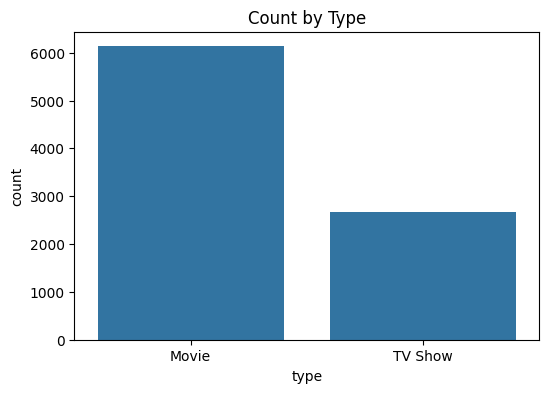

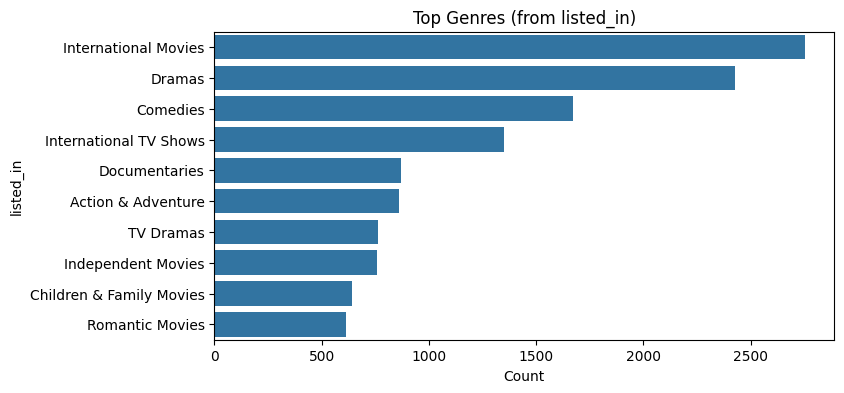

In [92]:
# Plot type distribution and top genres
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index) # Count plot for 'type' column in descending order
plt.title('Count by Type')
plt.show()

# Split listed_in into list of genres and show top genres (quick parsing)
if 'listed_in' in df.columns:
    # Explode genres by splitting on ', ' and counting occurrences
    genres = df['listed_in'].dropna().str.split(', ').explode()
    top_genres = genres.value_counts().head(10) # Top 10 genres
    plt.figure(figsize=(8,4))
    sns.barplot(x=top_genres.values, y=top_genres.index)
    plt.title('Top Genres (from listed_in)')
    plt.xlabel('Count')
    plt.show()